# Example of MetaX in `Command-line`

Set the path of the MetaX folder in the `PATH` environment variable.

In [134]:
import sys
import os
from pathlib import Path

myDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(myDir, os.pardir))
sys.path.append(parentDir)

path = Path(parentDir)
a=str(path.parent.absolute())

sys.path.append(a)



Import the libraries from the MetaX folder

In [135]:
from metax.taxafunc_analyzer.analyzer import TaxaFuncAnalyzer

Create a new OTF object.

In [136]:
df_path = '../metax/data/example_data/Example_OTF.tsv'
meta_path = '../metax/data/example_data/Example_Meta.tsv'
sw = TaxaFuncAnalyzer(df_path, meta_path, any_df_mode=False)

original df shape: (4391, 255)
after remove all zero row: (3981, 255)


Set the function for the analysis.

Common options:
- `eggNOG_OGs`, `max_annot_lvl`, `COG_category`, `eggNOG_Description`, `Gene`
- `GOs`, `EC`, `KEGG_ko`, `KEGG_Pathway`, `KEGG_Module`
- `KEGG_Reaction`, `KEGG_rclass`, `BRITE`, `KEGG_TC`, `CAZy`
- `BiGG_Reaction`, `PFAMs`, `dbcan_EC`, ...

In [137]:
sw.set_func('KEGG_ko')

Build multiple downstream matrices from the original TaxaFunc (OTF) table.


The function applies taxonomy-level filtering, functional filtering, outlier handling, data preprocessing (transform/normalize/batch correction), peptide-count filtering, optional function splitting, and quantification (sum or LFQ).

Usage:
```python
sw.set_func('KEGG_Pathway_name')
sw.set_group('Individual')
sw.set_multi_tables(
    level='s',
    func_threshold=1.00,
    outlier_params={'detect_method': 'missing-value', 'handle_method': 'fillzero',
                    'detection_by_group': 'Individual', 'handle_by_group': None},
    data_preprocess_params={'normalize_method': 'None', 'transform_method': 'log2',
                            'batch_meta': 'None', 'processing_order': ['transform', 'normalize', 'batch']},
    peptide_num_threshold={'taxa': 3, 'func': 3, 'taxa_func': 3},
    sum_protein=False,
    sum_protein_params={'method': 'anti-razor', 'by_sample': False,
                        'rank_method': 'unique_counts', 'greedy_method': 'heap',
                        'peptide_num_threshold': 3},
    keep_unknow_func=False,
    split_func=False,
    split_func_params={'split_by': '|', 'share_intensity': False},
    taxa_and_func_only_from_otf=False,
    quant_method='sum',
    remove_unknown_taxa=True
)
```

Parameters:
- level (str, default 's'):
  - Taxonomic aggregation level: 'm' (genome), 's' (species), 'g' (genus), 'f' (family), 'o' (order), 'c' (class), 'p' (phylum), 'd' (domain), 'l' (life).

- func_threshold (float, default 1.00):
  - Minimum proportion required in column "{func_name}_prop". Rows below threshold are filtered out.

- outlier_params (dict, default {'detect_method': None, 'handle_method': None, 'detection_by_group': None, 'handle_by_group': None}):
  - Settings for detect_and_handle_outliers.
    - detect_method: e.g., 'missing-value', 'zero-dominant', or None
    - handle_method: e.g., 'fillzero', 'original', or None
    - detection_by_group: meta column for per-group detection, or None
    - handle_by_group: meta column for per-group handling, or None

- data_preprocess_params (dict, default {'normalize_method': None, 'transform_method': None, 'batch_meta': None, 'processing_order': ['transform','normalize','batch']}):
  - Settings for data_preprocess.
    - normalize_method: e.g., 'None', 'median', 'quantile', 'trace_shift'
    - transform_method: e.g., 'None', 'log2', 'log10'
    - batch_meta: meta column name for batch correction, or 'None'
    - processing_order: a subset ordering of ['transform','normalize','batch']

- peptide_num_threshold (dict, default {'taxa': 1, 'func': 1, 'taxa_func': 1}):
  - Minimum peptide counts required for each level:
    - 'taxa': threshold for taxon-level filtering
    - 'func': threshold for function-level filtering
    - 'taxa_func': threshold for (taxon, function) pairs

- sum_protein (bool, default False):
  - Whether to build protein matrix by summarizing peptide intensities.

- sum_protein_params (dict, default {'method': 'razor','by_sample': False,'rank_method': 'unique_counts','greedy_method': 'heap','peptide_num_threshold': 1}):
  - Strategy for SumProteinIntensity. 'quant_method' is injected.
    - method: 'razor' or 'anti-razor'
    - by_sample (bool): assign razor peptides per sample
    - rank_method: e.g., 'unique_counts'
    - greedy_method: e.g., 'heap'
    - peptide_num_threshold: minimum peptides for protein summarization

- keep_unknow_func (bool, default False):
  - Keep rows where function == 'unknown' if True; otherwise filter out.

- split_func (bool, default False):
  - If True, split multi-annotated function fields (e.g., separated by '|') for func and taxa_func tables before final preprocessing.

- split_func_params (dict, default {'split_by': '|','share_intensity': False}):
  - Behavior when split_func=True.
    - split_by (str): delimiter to split function names
    - share_intensity (bool): if True, equally distribute intensity among splits

- taxa_and_func_only_from_otf (bool, default False):
  - If True, taxa_df and func_df are aggregated from taxa_func_df; otherwise built directly from OTF independently.

- quant_method (str, default 'sum'):
  - Quantification method: 'sum' (per-sample sum) or 'lfq' (MaxLFQ-like).

- remove_unknown_taxa (bool, default True):
  - Handling of unknown taxonomy at selected level:
    - True: remove taxa ending with "{level}__"
    - False: replace "{level}__" with "{level}__unknown"

Returns:
- None. Results are stored in instance attributes (e.g., taxa_df, func_df, taxa_func_df, etc.).

In [138]:
sw.set_multi_tables(level='s', 
                    outlier_params = {'detect_method': 'missing-value', 'handle_method': 'fillzero',
                        "detection_by_group" : 'Individual', "handle_by_group": None},
                    data_preprocess_params = {
                                            'normalize_method': 'None', 
                                            'transform_method': "log2",
                                            'batch_meta': 'None', 
                                            'processing_order': ['transform', 'normalize', 'batch']},
                peptide_num_threshold = {'taxa': 3, 'func': 3, 'taxa_func': 3},
                keep_unknow_func=False,
                sum_protein=False, 
                sum_protein_params = {'method': 'anti-razor', 'by_sample': False, 'rank_method': 'unique_counts', 'greedy_method': 'heap', 'peptide_num_threshold': 3},
                split_func=False, split_func_params = {'split_by': '|', 'share_intensity': False},
                taxa_and_func_only_from_otf=False, quant_method='sum', func_threshold=1.00, remove_unknown_taxa=True
                )


Original data shape: (3981, 255)
Starting to set Taxa table...
Remove the peptides with 's__'in Taxon column...
Removed: [42], Left: [1719]

-----Starting to perform outlier detection and handling for [Peptide-Taxon] table...-----

[2025-10-23 12:01:54] Start to detect outlier...
outlier_method is not set, outlier detection did not perform.

[2025-10-23 12:01:54] Start to handle missing value...

No missing value, skip outlier handling
Removed [210 taxa] from [270 Peptides] with less than [3] peptides.

-----Starting to perform data pre-processing for Taxa table...-----
Data transformed by [log2]
normalize_method is not set, data normalization did not perform.
batch_meta is not set, Batch effect removal did not perform.

[2025-10-23 12:01:54] -----Data preprocessing of TAXA finished.-----


-----Starting to perform outlier detection and handling for [Peptide-Function] table...-----

[2025-10-23 12:01:54] Start to detect outlier...
outlier_method is not set, outlier detection did not pe

Creating peptides_dict: 100%|██████████| 1243/1243 [00:00<00:00, 413902.82it/s]


-----Starting to perform transformation, normalization, and batch effect correction for [Peptide] table...-----
Data transformed by [log2]
normalize_method is not set, data normalization did not perform.
batch_meta is not set, Batch effect removal did not perform.

[2025-10-23 12:01:54] -----Data preprocessing of PEPTIDE finished.-----

Removed [994 taxa_func] from [1099 Peptides] with less than [3] peptides.

-----Starting to perform data pre-processing for [Taxa-Function] table...-----
Data transformed by [log2]
normalize_method is not set, data normalization did not perform.
batch_meta is not set, Batch effect removal did not perform.

[2025-10-23 12:01:54] -----Data preprocessing of TAXA_FUNC finished.-----

Setting taxa_func_linked_dict and func_taxa_linked_dict...


Multi-tables Created!
Waiting for further analysis...


Check meta table

In [139]:
sw.meta_df

,Sample,Individual,Sugar_name,Sugar_source,Sugar_type,full_name
0,V1_01,V1,PBS,PBS,PBS,PBS
1,V1_02,V1,ISO,sugar alcohols,CHO,Isomalt
2,V1_03,V1,SOR,sugar alcohols,CHO,Sorbitol (D-Sorbitol)
3,V1_04,V1,ERY,sugar alcohols,CHO,Erythritol (meso-Erythritol)
4,V1_05,V1,HSH,sugar alcohols,CHO,Hydrogenated starch hydrolysates
...,...,...,...,...,...,...
170,V5_34,V5,ACE2,synthetic,NAS,Acesulfame K
171,V5_35,V5,ASP,synthetic,NAS,Aspartame
172,V5_36,V5,NEO006,synthetic,NAS,Neotame
173,V5_37,V5,PBS,PBS,PBS,PBS


In [140]:
sw.set_group('Individual')

group is set to Individual
 {'V4', 'V1', 'V5', 'V3', 'V2'}


Check the attributes of the OTF object

In [141]:
sw.check_attributes()

Set:
  original_row_num
  original_df
  has_na_in_original_df
  genome_mode
  df_path
  meta_path
  peptide_col_name
  protein_col_name
  sample_col_prefix
  protein_separator
  custom_col_name
  sample_list
  meta_df
  meta_name
  group_list
  group_dict
  func_list
  func_name
  taxa_level
  processed_original_df
  peptide_df
  taxa_df
  func_df
  taxa_func_df
  func_taxa_df
  taxa_func_linked_dict
  func_taxa_linked_dict
  peptides_linked_dict
  any_df_mode
  peptide_num_used
  split_func_status
  split_func_sep
  stat_mean_by_zero_dominant
  BasicStats
  CrossTest
  GetMatrix
  detect_and_handle_outliers
  data_preprocess

Not set:
  protein_df
  custom_df
  distinct_peptides_list



Use the `get_df` method to get the Taxa, Function, OTFs, and Peptides tables
Get the dataframe without peptide_num column

### Parameters:
- table_name (str): The name of the table to retrieve. Valid options are:
    - `peptide`: Returns the peptide_df table.
    - `taxa`: Returns the taxa_df table.
    - `func`: Returns the func_df table.
    - `taxa_func`: Returns the taxa_func_df table.
    - `func_taxa`: Returns the func_taxa_df table.
    - `custom`: Returns the custom_df table.

Returns:
- `pandas.DataFrame`


In [142]:
sw.get_df(table_name='taxa')

,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis,0.000000,0.000000,0.000000,0.000000,17.028111,0.000000,0.000000,18.623146,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum,0.000000,0.000000,20.609335,0.000000,20.285054,20.011261,0.000000,16.079339,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp002232035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.369350,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides bouchesdurhonensis,17.556454,0.000000,0.000000,0.000000,0.000000,0.000000,19.949610,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.400729,20.681980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Fusobacterium_A|s__Fusobacterium_A sp900555485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Parasutterella|s__Parasutterella sp000980495,0.000000,17.573995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.105786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.292034,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Sutterella|s__Sutterella wadsworthensis_A,0.000000,0.000000,0.000000,17.446760,0.000000,0.000000,16.187603,18.231277,17.887595,0.000000,...,0.000000,20.579398,20.217741,0.000000,0.000000,20.366412,22.970795,0.000000,20.422232,0.000000


Use basic Statistics

In [143]:
sw.BasicStats.get_stats_peptide_num_in_taxa()

,LCA_level,count,freq,label
0,genome,1758,44.16,genome (44.16%)
1,species,3,0.08,species (0.08%)
2,genus,878,22.05,genus (22.05%)
3,family,709,17.81,family (17.81%)
4,order,182,4.57,order (4.57%)
5,class,121,3.04,class (3.04%)
6,phylum,50,1.26,phylum (1.26%)
7,domain,273,6.86,domain (6.86%)
8,life,7,0.18,life (0.18%)
9,notFound,0,0.00,notFound (0.0%)


In [144]:
sw.BasicStats.get_stats_taxa_level()

,taxa_level,count
0,domain,2
1,phylum,13
2,class,16
3,order,32
4,family,54
5,genus,168
6,species,316
7,genome,346


In [145]:
sw.BasicStats.get_stats_func_prop(func_name='KEGG_Pathway')

,prop,n,freq,label
0,0-0.1,0,0.00,0-0.1 (0.0%)
1,0-0.2,0,0.00,0-0.2 (0.0%)
2,0-0.3,0,0.00,0-0.3 (0.0%)
3,0-0.4,1,0.04,0-0.4 (0.04%)
4,0-0.5,1,0.04,0-0.5 (0.04%)
5,0.5-0.6,38,1.51,0.5-0.6 (1.51%)
6,0.6-0.7,32,1.27,0.6-0.7 (1.27%)
7,0.7-0.8,18,0.71,0.7-0.8 (0.71%)
8,0.8-0.9,23,0.91,0.8-0.9 (0.91%)
9,0.9-1,39,1.55,0.9-1 (1.55%)


Use class `BasicPlot` to plot PCA, Heatmap, Correlation, Boxplot, and other plots

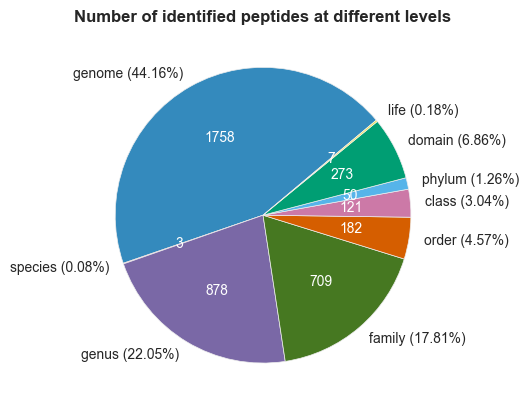

In [146]:
from metax.taxafunc_ploter.basic_plot import BasicPlot

BasicPlot(sw).plot_taxa_stats_pie(theme='bmh')

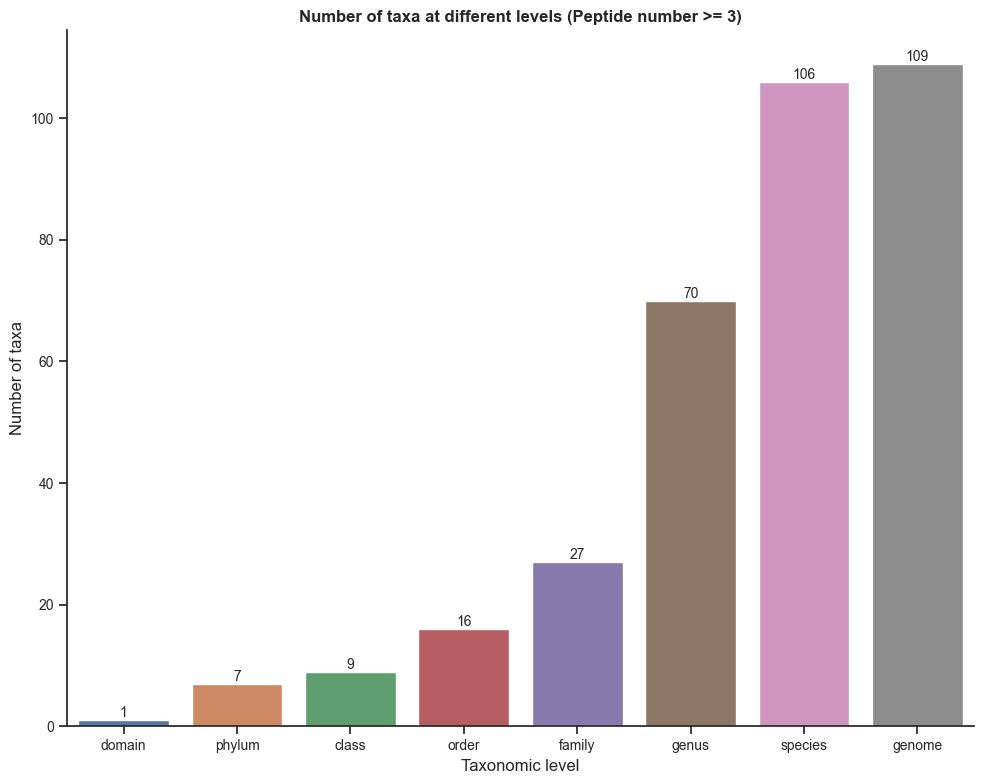

<Axes: title={'center': 'Number of taxa at different levels (Peptide number >= 3)'}, xlabel='Taxonomic level', ylabel='Number of taxa'>

In [147]:
BasicPlot(sw).plot_taxa_number(theme='Auto', peptide_num=3, res_type='show')

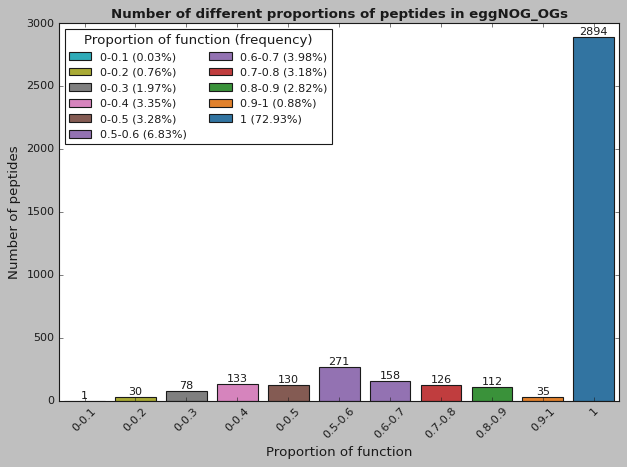

<Axes: title={'center': 'Number of different proportions of peptides in eggNOG_OGs'}, xlabel='Proportion of function', ylabel='Number of peptides'>

In [148]:
BasicPlot(sw).plot_prop_stats(func_name = 'eggNOG_OGs', res_type='show', font_size=10, theme='classic')

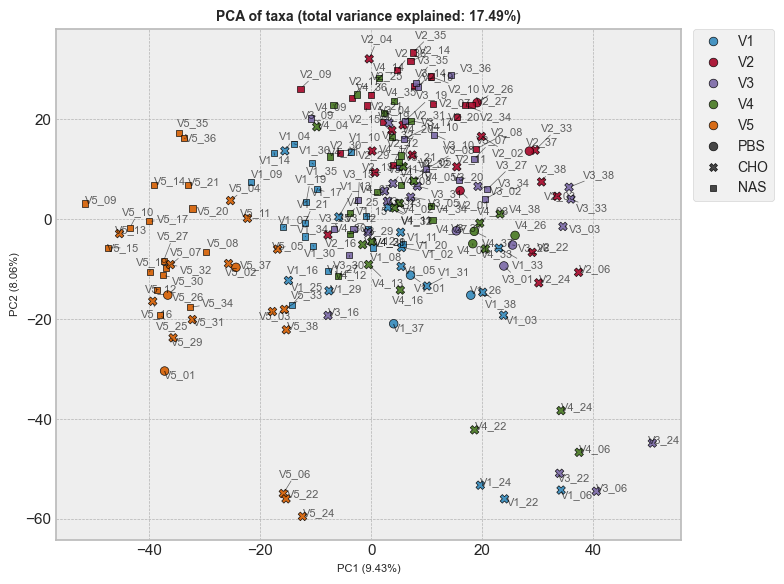

<Axes: title={'center': 'PCA of taxa (total variance explained: 17.49%)'}, xlabel='PC1 (9.43%)', ylabel='PC2 (8.06%)'>

In [149]:
BasicPlot(sw).plot_pca_sns(df=sw.get_df(table_name='taxa'), title_name='taxa', 
                           show_label=True, width=8, height=6, font_size=8, rename_sample=False, 
                           font_transparency=0.6, adjust_label=True, theme='bmh',
                           sub_meta='Sugar_type', legend_col_num=None, dot_size=None)

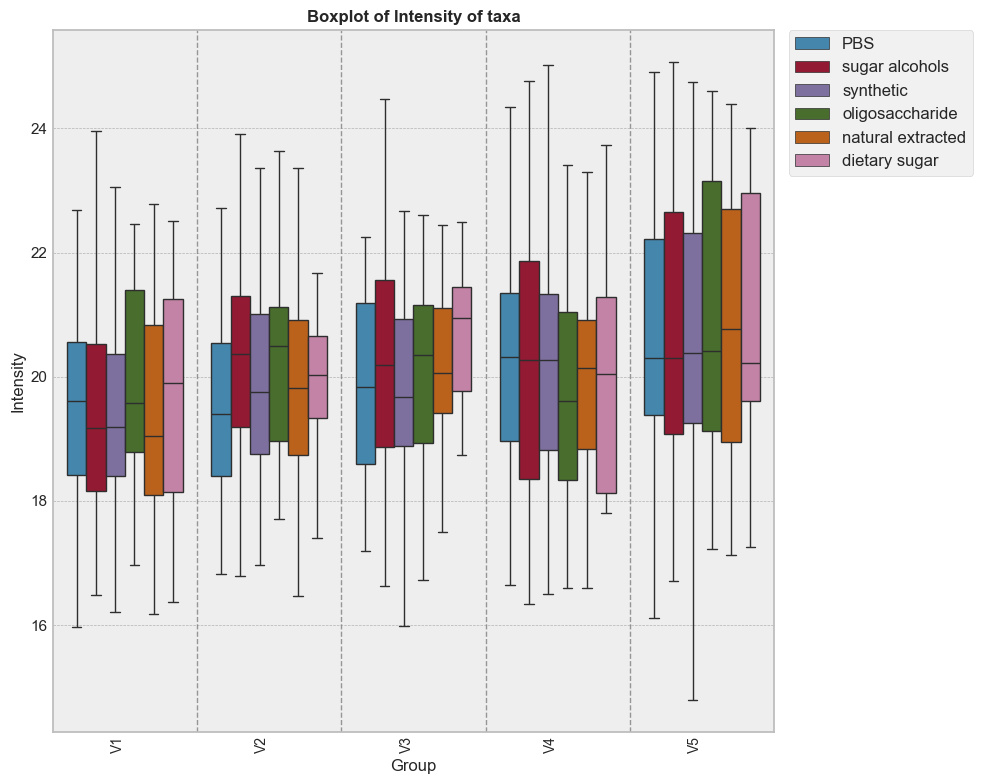

<Axes: title={'center': 'Boxplot of Intensity of taxa'}, xlabel='Group', ylabel='Intensity'>

In [150]:
BasicPlot(sw).plot_box_sns(df=sw.get_df(table_name='taxa_func'), title_name='taxa', show_fliers=False, 
                           width=10, height=8, font_size=10, theme='bmh', rename_sample=False, 
                           plot_samples=False, legend_col_num=1, sub_meta='Sugar_source')

The min number of Functions:
Group SubGroup  Number
   V5      PBS     168
The max number of Functions:
Group SubGroup  Number
   V1      CHO     230
   V5      CHO     230


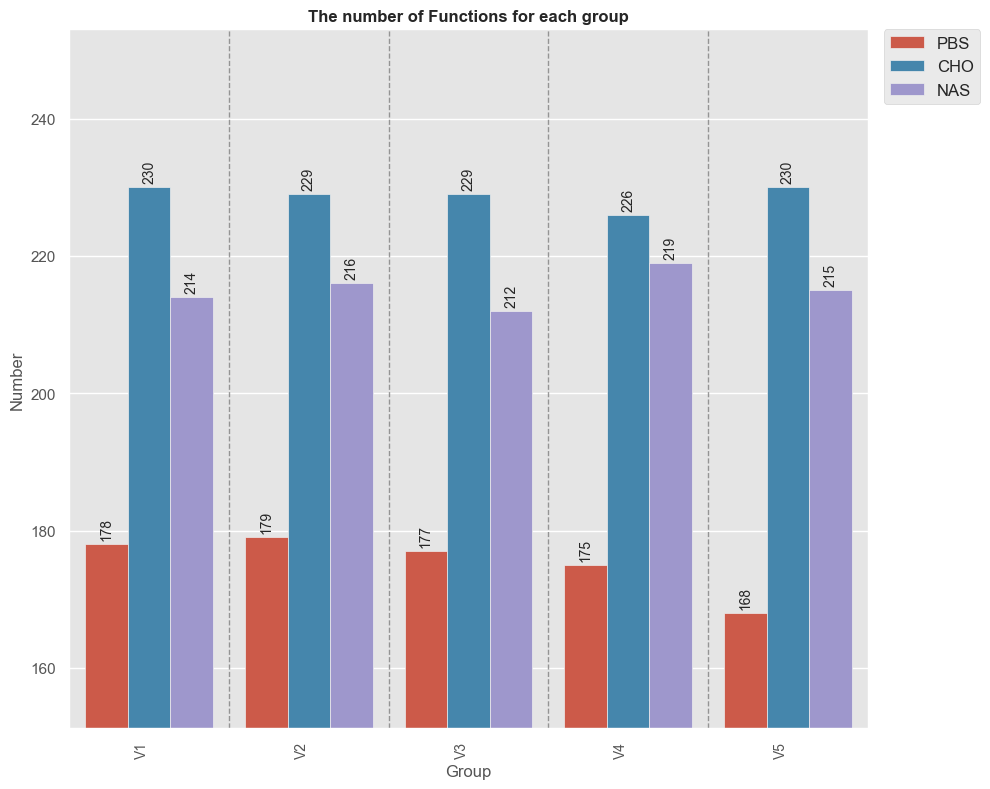

<Axes: title={'center': 'The number of Functions for each group'}, xlabel='Group', ylabel='Number'>

In [151]:
BasicPlot(sw).plot_number_bar(df=sw.get_df(table_name='func'), title_name='Functions', 
                              width=10, height=8, font_size=10, theme='ggplot',
                              plot_sample=False, show_label=True, rename_sample=False, 
                              legend_col_num=None, sub_meta='Sugar_type')

In [152]:
from metax.taxafunc_ploter.heatmap_plot import HeatmapPlot

In [153]:
sw.get_df(table_name='taxa_func')

V1_01  \
Taxon                                              KEGG_ko                                    
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835                      20.130974   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      22.599317   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      18.489346   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959                       0.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02768,ko:K02769,ko:K02770   0.000000   
                                                   ko:K03522,ko:K22432            19.174587   
                                                   ko:K10540                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00656,ko:K20038             0.000000   
                                                   ko:K03737                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00656,ko:K20038             0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K03737                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      19.894328   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      17.932267   
                                                   ko:K03737                       0.000000   
                                                   ko:K04077                      19.499511   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02190                      21.299162   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02935                      17.799870   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      19.565742   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01421                       0.000000   
                                                   ko:K01740                      20.487045   
                                                   ko:K02406                      20.988851   
                                                   ko:K03406                      19.162436   
                                                   ko:K03530                      20.039290   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02406                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K05878                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K02035                       0.000000   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K03521,ko:K22431             0.000000   
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_... ko:K01615                       0.000000   
d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe... ko:K00134                       0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00297,ko:K10901             0.000000   
                                                   ko:K05881                       0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00656                      22.539707   

                                                                                      V1_02  \
Taxon                                              KEGG_ko                                    
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835                      19.024296   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      22.940871   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                       0.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959                       0.000000   


In [154]:
df = sw.get_df(table_name='taxa_func')
display(df.head())
df = sw.replace_if_two_index(df) # for taxa_func or func_taxa table, replace the two index with one to make it easier to plot
display(df.head())

,,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Taxon,KEGG_ko,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola dorei,ko:K01835,20.130974,19.024296,0.000000,18.585469,19.183715,19.620512,0.000000,0.000000,19.303415,0.000000,...,19.011667,18.912234,0.000000,0.000000,18.432713,19.345264,20.901088,0.0,20.542617,18.813221
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola massiliensis,ko:K21572,22.599317,22.940871,24.099818,23.157974,22.902473,22.590776,23.046792,23.020612,22.895896,21.800569,...,0.000000,0.000000,17.716076,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,18.149896
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella copri_A,ko:K21572,18.489346,0.000000,18.853188,0.000000,18.141558,0.000000,18.465283,19.261269,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.399837,21.401132,22.666350,0.000000,0.0,0.000000,22.736816
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella sp900557255,ko:K02959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Tannerellaceae|g__Parabacteroides|s__Parabacteroides distasonis,ko:K21572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.470248,0.000000,20.125662,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Taxa-Func,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola dorei <ko:K01835>,20.130974,19.024296,0.000000,18.585469,19.183715,19.620512,0.000000,0.000000,19.303415,0.000000,...,19.011667,18.912234,0.000000,0.000000,18.432713,19.345264,20.901088,0.0,20.542617,18.813221
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola massiliensis <ko:K21572>,22.599317,22.940871,24.099818,23.157974,22.902473,22.590776,23.046792,23.020612,22.895896,21.800569,...,0.000000,0.000000,17.716076,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,18.149896
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella copri_A <ko:K21572>,18.489346,0.000000,18.853188,0.000000,18.141558,0.000000,18.465283,19.261269,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.399837,21.401132,22.666350,0.000000,0.0,0.000000,22.736816
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella sp900557255 <ko:K02959>,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Tannerellaceae|g__Parabacteroides|s__Parabacteroides distasonis <ko:K21572>,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.470248,0.000000,20.125662,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


Scaling the data by [row] using method [maxmin]


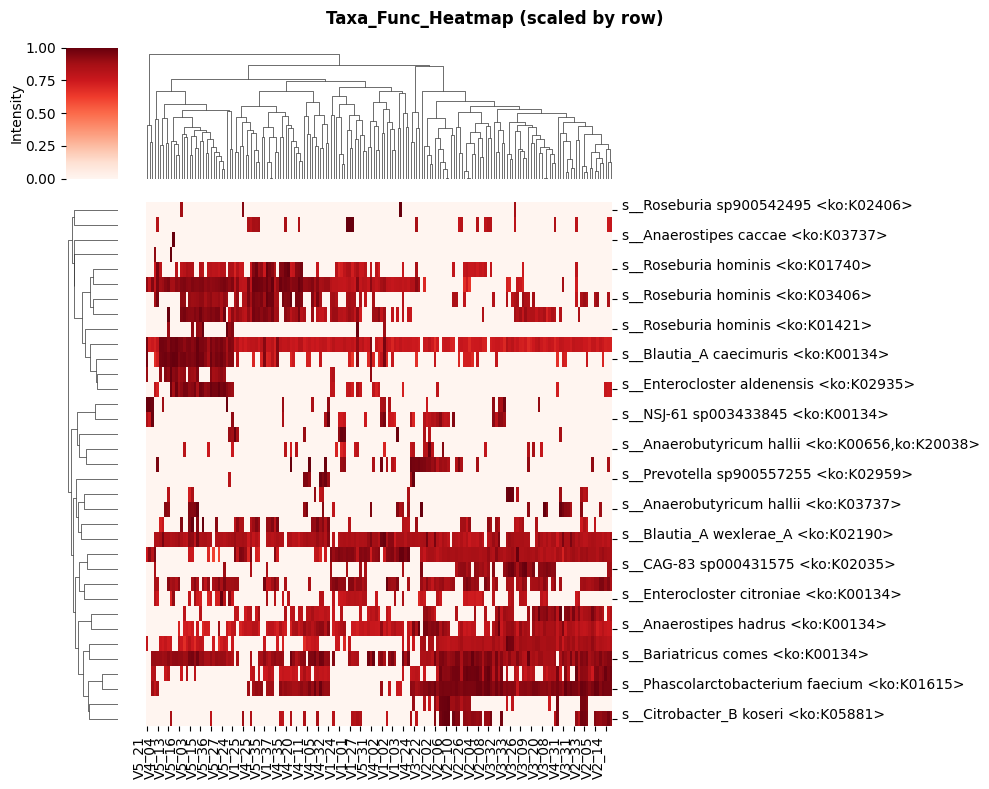

In [155]:
HeatmapPlot(sw).plot_basic_heatmap(df=df, title='Taxa_Func_Heatmap',
                                      fig_size=(10, 8), scale='row',scale_method = "maxmin", 
                                      col_cluster=True, row_cluster=True, cmap='Reds',
                                      rename_taxa=True, font_size=10,
                                      show_all_labels=(False, False), linecolor=None)


## Statistical Analysis

change meta sa "Sugar_type"

In [156]:
sw.set_group('Sugar_type')

group is set to Sugar_type
 {'CHO', 'NAS', 'PBS'}


### T-test, ANOVA, and other statistical tests

Run T-test to compare the "PBS" and "NAS" groups, and only select samples in 'V1' and 'V2' of Individulal.

`condtions`(Optional): The conditions to filter the samples. Default is None.

In [157]:
#TODO: add more examples
df_t_test = sw.CrossTest.get_stats_ttest(group_list = ['PBS', 'NAS'],
                                         df_type = 'taxa-func', 
                                         condition = ['Individual', ['V1', 'V2']])
df_t_test

t-test for taxa-func in ['PBS', 'NAS']


100%|██████████| 35/35 [00:00<00:00, 218.69it/s]


pvalue  \
Taxon                                              KEGG_ko                                       
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835                      1.350874e-02   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      9.082785e-01   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      6.727565e-04   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959                      1.000000e+00   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      5.552379e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02768,ko:K02769,ko:K02770  1.000000e+00   
                                                   ko:K03522,ko:K22432            5.520308e-01   
                                                   ko:K10540                      3.064482e-02   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00656,ko:K20038            4.626642e-01   
                                                   ko:K03737                      6.800369e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00656,ko:K20038            3.894974e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K03737                      1.000000e+00   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      6.468784e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      1.047174e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      7.093570e-07   
                                                   ko:K03737                      5.542366e-01   
                                                   ko:K04077                      4.830384e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02190                      3.220854e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02935                      9.757539e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      1.425151e-03   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134                      1.000000e+00   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01421                      1.000000e+00   
                                                   ko:K01740                      2.596130e-02   
                                                   ko:K02406                      5.447710e-02   
                                                   ko:K03406                      3.996119e-01   
                                                   ko:K03530                      5.458307e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K02406                      6.800369e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K05878                      1.000000e+00   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K02035                      5.678369e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K03521,ko:K22431            9.458927e-01   
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_... ko:K01615                      9.856136e-01   
d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe... ko:K00134                      3.916551e-01   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00297,ko:K10901            5.349329e-02   
                                                   ko:K05881                      8.740040e-01   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00656                      5.076651e-01   

                                                                                      padj  \
Taxon                                              KEGG_ko                                   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835                      0.118201   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572                      0.0

Same as ANOVA, but the group is more than two.

In [158]:
df_anova_test = sw.CrossTest.get_stats_anova(group_list = ['PBS', 'NAS', 'CHO'],
                                                df_type = 'taxa', 
                                                condition = None)
df_anova_test

--ANOVA test for Taxon in ['PBS', 'NAS', 'CHO'] with condition: None--


100%|██████████| 106/106 [00:00<00:00, 200.15it/s]


,pvalue,padj,f-statistic,V1_01,V1_26,V1_37,V2_01,V2_26,V2_37,V3_01,...,V5_11,V5_13,V5_16,V5_22,V5_24,V5_29,V5_31,V5_32,V5_33,V5_38
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve,9.600810e-01,9.692246e-01,0.040747,0.000000,0.000000,0.000000,0.000000,19.892752,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis,9.602277e-03,2.544603e-02,4.773528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,20.265748,17.600436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum,4.832535e-12,1.280622e-10,30.433462,0.000000,20.251545,0.000000,0.000000,0.000000,21.456202,21.413947,...,0.00000,0.000000,0.000000,19.132151,17.630381,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp002232035,9.094473e-01,9.269367e-01,0.094971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,21.488852,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides bouchesdurhonensis,1.064508e-08,1.880631e-07,20.464795,17.556454,18.015355,17.802838,18.883106,21.799748,0.000000,18.235566,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.681980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Fusobacterium_A|s__Fusobacterium_A sp900555485,7.793646e-01,8.020646e-01,0.249638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Parasutterella|s__Parasutterella sp000980495,2.129353e-01,3.050154e-01,1.560761,0.000000,0.000000,0.000000,19.169370,19.420234,19.752637,20.297042,...,0.00000,0.000000,0.000000,0.000000,0.000000,16.105786,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Sutterella|s__Sutterella wadsworthensis_A,3.488663e-01,4.455401e-01,1.059540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,21.640882,21.500102,20.828860,21.338494,0.000000,20.217741,0.000000,0.000000,0.000000


Tukey's HSD test can be used to find the specific difference between groups after ANOVA.
-   Set `taxon_name` only: calculate all the functions in the taxa.
-   Set `func_name` only: calculate all the taxa in the function.
-   Set `taxon_name` and `func_name`: calculate all peptides in the taxa and function.
-   `sum_all`: 
    -   True: sum all items in the taxa, function or taxa-function frist, then run Tukey's HSD test.
    -   False: run Tukey's HSD test directly for all items in the taxa, function or taxa-function.

In [159]:
df_tukey = sw.CrossTest.get_stats_tukey_test(taxon_name='d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli_D', 
                                             func_name=None, 
                                             sum_all=False, 
                                             condition=['V1', 'V2'])
df_tukey

  group1 group2  meandiff   p-adj   lower   upper  reject significant  \
0    CHO    NAS    3.7144  0.0008  1.3586  6.0702    True         Yes   
1    CHO    PBS    2.5069  0.3384 -1.6990  6.7128   False          No   
2    NAS    PBS   -1.2075  0.7722 -5.3720  2.9569   False          No   

    Function  
0  ko:K00656  
1  ko:K00656  
2  ko:K00656  


,group1,group2,meandiff,p-adj,lower,upper,reject,significant,Function
0,CHO,NAS,3.7144,0.0008,1.3586,6.0702,True,Yes,ko:K00656
1,CHO,PBS,2.5069,0.3384,-1.6990,6.7128,False,No,ko:K00656
2,NAS,PBS,-1.2075,0.7722,-5.3720,2.9569,False,No,ko:K00656


PyDeseq2 is used to analyze the differential expression of taxa and functions.

In [160]:
df_deseq2 = sw.CrossTest.get_stats_deseq2(df = sw.get_df(table_name='taxa_func'),
                                            group1 = 'CHO', group2 = 'NAS', condition = ['Individual', ['V2', 'V3', 'V4', 'V5']])
df_deseq2


--Running Deseq2 [CHO] vs [NAS] with condition: [['Individual', ['V2', 'V3', 'V4', 'V5']]]--
group1 [CHO]:
['V2_02', 'V2_03', 'V2_04', 'V2_05', 'V2_06', 'V2_11', 'V2_13', 'V2_16', 'V2_22', 'V2_24', 'V2_29', 'V2_31', 'V2_32', 'V2_33', 'V2_38', 'V3_02', 'V3_03', 'V3_04', 'V3_05', 'V3_06', 'V3_11', 'V3_13', 'V3_16', 'V3_22', 'V3_24', 'V3_29', 'V3_31', 'V3_32', 'V3_33', 'V3_38', 'V4_02', 'V4_03', 'V4_04', 'V4_05', 'V4_06', 'V4_11', 'V4_13', 'V4_16', 'V4_22', 'V4_24', 'V4_29', 'V4_31', 'V4_32', 'V4_33', 'V4_38', 'V5_02', 'V5_03', 'V5_04', 'V5_05', 'V5_06', 'V5_11', 'V5_13', 'V5_16', 'V5_22', 'V5_24', 'V5_29', 'V5_31', 'V5_32', 'V5_33', 'V5_38']

group2 [NAS]:
['V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_12', 'V2_14', 'V2_15', 'V2_17', 'V2_19', 'V2_20', 'V2_21', 'V2_25', 'V2_27', 'V2_30', 'V2_34', 'V2_35', 'V2_36', 'V3_07', 'V3_08', 'V3_09', 'V3_10', 'V3_12', 'V3_14', 'V3_15', 'V3_17', 'V3_19', 'V3_20', 'V3_21', 'V3_25', 'V3_27', 'V3_30', 'V3_34', 'V3_35', 'V3_36', 'V4_07', 'V4_08', 'V4_09', 'V

Fitting size factors...
Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

... done in 13.58 seconds.

Fitting dispersions...
... done in 0.04 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 2 outlier genes.

Running Wald tests...
... done in 0.02 seconds.



Log2 fold change & Wald test p-value: Sugar-type NAS vs CHO
                                                     baseMean  log2FoldChange  \
Taxa-Func                                                                       
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   9.792207       -0.359917   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  13.098814       -0.046396   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   4.631429       -0.431937   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   1.615777       -4.191825   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   2.435106        0.705042   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   1.788952       -4.340221   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  14.335239        0.006153   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   9.611744       -0.123710   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2.924034       -0.280504   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La..

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V2_02,V2_03,V2_04,V2_05,...,V5_17,V5_19,V5_20,V5_21,V5_25,V5_27,V5_30,V5_34,V5_35,V5_36
Taxa-Func,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola dorei <ko:K01835>,9.792207,-0.359917,0.508693,-0.707533,0.479235,0.905115,19.068595,18.834928,19.331658,19.385576,...,0.000000,20.012724,19.609999,0.000000,0.000000,18.620188,18.912234,19.345264,20.901088,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Phocaeicola|s__Phocaeicola massiliensis <ko:K21572>,13.098814,-0.046396,0.404734,-0.114634,0.908735,0.967363,20.307542,21.405172,20.835278,20.961498,...,0.000000,0.000000,16.759927,18.053125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella copri_A <ko:K21572>,4.631429,-0.431937,0.983526,-0.439172,0.660537,0.967363,0.000000,16.957646,0.000000,17.887471,...,0.000000,0.000000,0.000000,0.000000,21.457545,0.000000,0.000000,22.666350,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella sp900557255 <ko:K02959>,1.615777,-4.191825,1.770506,-2.367586,0.017905,0.118170,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Tannerellaceae|g__Parabacteroides|s__Parabacteroides distasonis <ko:K21572>,2.435106,0.705042,1.558398,0.452415,0.650970,0.967363,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,22.708097,0.000000,0.000000,22.470248,0.000000,0.000000,0.000000
"d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Agathobacter|s__Agathobacter rectalis <ko:K02768,ko:K02769,ko:K02770>",1.788952,-4.340221,1.471285,-2.949952,0.003178,0.104882,0.000000,19.959218,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Agathobacter|s__Agathobacter rectalis <ko:K03522,ko:K22432>",14.335239,0.006153,0.325675,0.018893,0.984927,0.984927,0.000000,20.946240,20.382308,21.440267,...,18.452310,16.542019,0.000000,19.104670,18.443429,18.038458,18.218341,18.955712,18.704569,0.000000
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Agathobacter|s__Agathobacter rectalis <ko:K10540>,9.611744,-0.123710,0.539982,-0.229100,0.818791,0.967363,17.070666,18.359531,0.000000,20.289247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Anaerobutyricum|s__Anaerobutyricum hallii <ko:K00656,ko:K20038>",2.924034,-0.280504,1.350607,-0.207687,0.835473,0.967363,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.337082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [161]:
from metax.taxafunc_ploter.volcano_plot_js import VolcanoPlotJS
from metax.taxafunc_ploter.volcano_plot import VolcanoPlot

In [162]:
pvalue = 0.05
p_type = 'pvalue'
log2fc_min = 1
log2fc_max = 20
title_name = 'Volcano_Plot'
font_size = 12
width = 8
height = 6
dot_size = 5
pic = VolcanoPlotJS().plot_volcano_js(df_deseq2, pvalue = pvalue, p_type = p_type,
                                    log2fc_min = log2fc_min, log2fc_max=log2fc_max, 
                                    title_name=title_name,  font_size = font_size,
                                    width=width, height=height, dot_size=dot_size)
pic.render_notebook()

{'up': 3, 'down': 2, 'ultra-up': 0, 'ultra-down': 0, 'normal': 30}


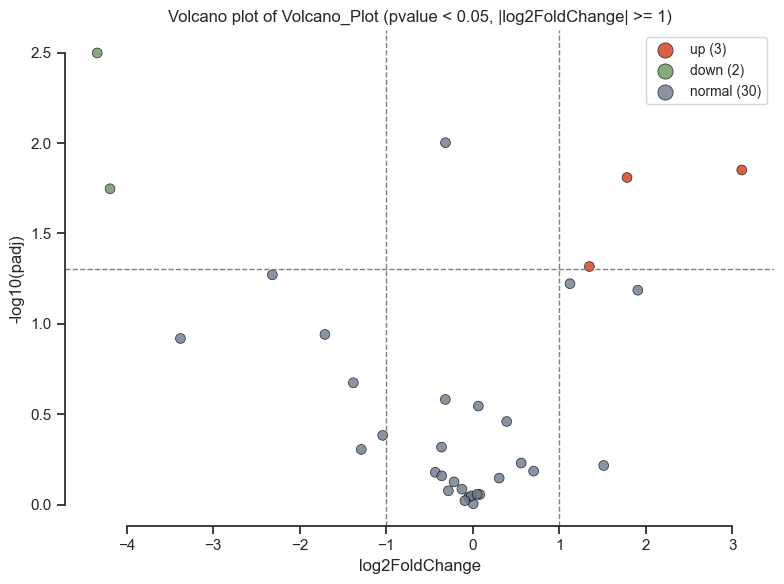

<Axes: title={'center': 'Volcano plot of Volcano_Plot (pvalue < 0.05, |log2FoldChange| >= 1)'}, xlabel='log2FoldChange', ylabel='-log10(padj)'>

In [163]:
VolcanoPlot().plot_volcano(df_deseq2, pvalue = pvalue, p_type = p_type,
                                    log2fc_min = log2fc_min, log2fc_max=log2fc_max, 
                                    title_name=title_name,  font_size = font_size,
                                    width=width, height=height, dot_size=dot_size,
                                    theme = None)

### Functioncal Redundancy Analysis
Find taxa not significant but related function significant or vice versa.

In [164]:
taxa_func_sig = sw.CrossTest.get_stats_diff_taxa_but_func(
    group_list=["NAS", "CHO"],
    p_value=0.05,
    condition=None
)
print("The taxa not significant but related function significant")
df1 = taxa_func_sig[0]
display(df1)
print("The taxa significant but related function not significant")
df2 = taxa_func_sig[1]
display(df2)

Using [padj] for filtering
No test result given, calculating the test result first
--Calculating t-test for ['NAS', 'CHO'] with condition: None--
t-test for Taxon in ['NAS', 'CHO'] with condition: None


100%|██████████| 106/106 [00:00<00:00, 283.28it/s]


t-test for KEGG_ko in ['NAS', 'CHO'] with condition: None


100%|██████████| 250/250 [00:00<00:00, 353.79it/s]


t-test for taxa-func in ['NAS', 'CHO']


100%|██████████| 35/35 [00:00<00:00, 374.02it/s]

Under padj = 0.05: 
               Significant Taxa: [37], Not Significant Taxa: [69]
Under padj = 0.05: 
                 Significant Function: [76], Not Significant Function: [174]
Taxa not significant but related function significant with padj < 0.05: [0]
Function not significant but related taxa significant with padj < 0.05: [7]
Returning a tuple of two dataframesthe:
             1. the taxa not significant but related function significant
             2. the function not significant but related taxa significant
The taxa not significant but related function significant


,,pvalue,padj,t-statistic,V1_07,V1_08,V1_09,V1_10,V1_12,V1_14,V1_15,...,V5_11,V5_13,V5_16,V5_22,V5_24,V5_29,V5_31,V5_32,V5_33,V5_38
Taxon,KEGG_ko,,,,,,,,,,,,,,,,,,,,,


The taxa significant but related function not significant


pvalue  \
KEGG_ko             Taxon                                                          
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.002177   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000102   
                    d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe...  0.000745   
ko:K00656,ko:K20038 d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000145   
ko:K01740           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000016   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  0.000787   
ko:K03530           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000509   

                                                                            padj  \
KEGG_ko             Taxon                                                          
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.005861   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000658   
                    d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe...  0.002295   
ko:K00656,ko:K20038 d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000723   
ko:K01740           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.000182   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  0.002295   
ko:K03530           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  0.001782   

                                                                        t-statistic  \
KEGG_ko             Taxon                                                             
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     3.116158   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     3.987989   
                    d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe...     3.439529   
ko:K00656,ko:K20038 d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     3.894992   
ko:K01740           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    -4.457720   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...    -3.423684   
ko:K03530           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    -3.549237   

                                                                        V1_07  \
KEGG_ko             Taxon                                                       
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    0.0   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    0.0   
                    d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe...    0.0   
ko:K00656,ko:K20038 d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    0.0   
ko:K01740           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    0.0   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...    0.0   
ko:K03530           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    0.0   

                                                                            V1_08  \
KEGG_ko             Taxon                                                           
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  17.393935   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   0.000000   
                    d__Bacteria|p__Firmicutes|c__Bacilli|o__Erysipe...   0.000000   
ko:K00656,ko:K20038 d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   0.000000   
ko:K01740           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  18.232102   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...   0.000000   
ko:K03530           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  19.667132   

                                                                            V1_09  \
KEGG_ko             Taxon                                                           
ko:K00134           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   0.000000   
                    d__Ba

### Comapre multiple groups to Control Group

In [165]:
# Dunntest
df_dunnett = sw.CrossTest.get_stats_dunnett_test(
    control_group="PBS", # set the control group
    group_list=["NAS", "CHO"], # set the test group, at least two groups
    df_type="taxa-func",
    condition=["Individual", ["V1", "V2"]],
)
df_dunnett.head()


Dunnett's test for taxa-func in ['CHO', 'NAS'] with condition: ['Individual', ['V1', 'V2']]
control group: PBS
primary index: Taxon
secondary index: KEGG_ko


100%|██████████| 35/35 [00:00<00:00, 63.09it/s]


CHO  \
                                                                  padj   
Taxon                                              KEGG_ko               
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835  0.971470   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.085527   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  1.000000   

                                                                        \
                                                                pvalue   
Taxon                                              KEGG_ko               
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835  0.374433   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.493719   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.008553   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.880753   

                                                                        \
                                                             statistic   
Taxon                                              KEGG_ko               
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835 -1.097840   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.896164   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572 -2.882672   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959       NaN   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.338587   

                                                                   NAS  \
                                                                  padj   
Taxon                                              KEGG_ko               
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835  0.089003   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.019646   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  1.000000   

                                                                        \
                                                                pvalue   
Taxon                                              KEGG_ko               
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835  0.010172   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.987138   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.001403   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959  1.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.653366   

                                                                        
                                                             statistic  
Taxon                                              KEGG_ko              
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835 -2.818727  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.105129  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572 -3.496294  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02959       NaN  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K21572  0.662311

In [166]:
# Deseq2
df_deseq2_against_control = sw.CrossTest.get_stats_deseq2_against_control(
    df=sw.get_df(table_name='taxa'),
    control_group="PBS",
    group_list=["NAS", "CHO"],
    concat_sample_to_result = False,
    condition=["Individual", ["V1", "V2"]],
)


df_deseq2_against_control.head()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.06 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...



-------------Start to compare [PBS] and [NAS]----------------


--Running Deseq2 [PBS] vs [NAS] with condition: [['Individual', ['V1', 'V2']]]--
group1 [PBS]:
['V1_01', 'V1_26', 'V1_37', 'V2_01', 'V2_26', 'V2_37']

group2 [NAS]:
['V1_07', 'V1_08', 'V1_09', 'V1_10', 'V1_12', 'V1_14', 'V1_15', 'V1_17', 'V1_19', 'V1_20', 'V1_21', 'V1_25', 'V1_27', 'V1_30', 'V1_34', 'V1_35', 'V1_36', 'V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_12', 'V2_14', 'V2_15', 'V2_17', 'V2_19', 'V2_20', 'V2_21', 'V2_25', 'V2_27', 'V2_30', 'V2_34', 'V2_35', 'V2_36']

The max value is [26.841554954354383], not larger than int32, no need to divide


... done in 0.05 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 21 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 0.08 seconds.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.05 seconds.

Fitting dispersion trend curve...
... done in 0.03 seconds.

Fitting MAP dispersions...


Log2 fold change & Wald test p-value: Sugar-type PBS vs NAS
                                                     baseMean  log2FoldChange  \
Taxon                                                                           
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.869632        0.140169   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.470421       -4.029537   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   3.364733        1.244886   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...   1.601996       -3.404627   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   4.646795        2.350683   
...                                                       ...             ...   
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|...   0.975549       -2.688572   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   6.197406        0.713307   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   3.419057       -4.498589   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac..

... done in 0.08 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 19 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: Sugar-type PBS vs CHO
                                                     baseMean  log2FoldChange  \
Taxon                                                                           
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.113612        0.732769   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   5.443740       -5.158811   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  14.500450       -1.239285   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...   0.000000        0.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   3.704217        3.386365   
...                                                       ...             ...   
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|...   0.000000        0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   8.579425        0.193352   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   1.955885       -3.682438   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac..

... done in 0.06 seconds.



NAS                 \
                                                    baseMean log2FoldChange   
Taxon                                                                         
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.869632      -0.140169   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.470421       4.029537   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.364733      -1.244886   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  1.601996       3.404627   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  4.646795      -2.350683   

                                                                        \
                                                       lfcSE      stat   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.378247  0.041492   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.742161 -1.076794   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.180291  0.391438   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  4.168669 -0.816718   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  2.659350  0.883931   

                                                                        \
                                                      pvalue      padj   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.966904  0.982549   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.281572  0.982549   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.695474  0.982549   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  0.414090  0.982549   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  0.376733  0.982549   

                                                          CHO                 \
                                                     baseMean log2FoldChange   
Taxon                                                                          
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.113612      -0.732769   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   5.443740       5.158811   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  14.500450       1.239285   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...   0.000000      -0.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   3.704217      -3.386365   

                                                                        \
                                                       lfcSE      stat   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.889870  0.188379   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.655178 -1.942925   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.942442 -1.314973   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  0.000000  0.000000   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  2.783455  1.216605   

                                                                        
                                                      pvalue      padj  
Taxon                                                                   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...       NaN       NaN  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.052025  0.821999  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.188519  0.915254  
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...       NaN       NaN  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  0.223755  0.915254

### All the results can be plot easily by `taxafunc_ploter`

In [167]:
from metax.taxafunc_ploter.heatmap_plot import HeatmapPlot
from metax.taxafunc_ploter.tukey_plot import TukeyPlot
from metax.taxafunc_ploter.sankey_plot import SankeyPlot



RESULT:
Number of significant by padj < 0.05: 3
Top [100] significant: Taxa (3), Functions (2)
Scaling the data by [None] using method [maxmin]
No scaling is performed.


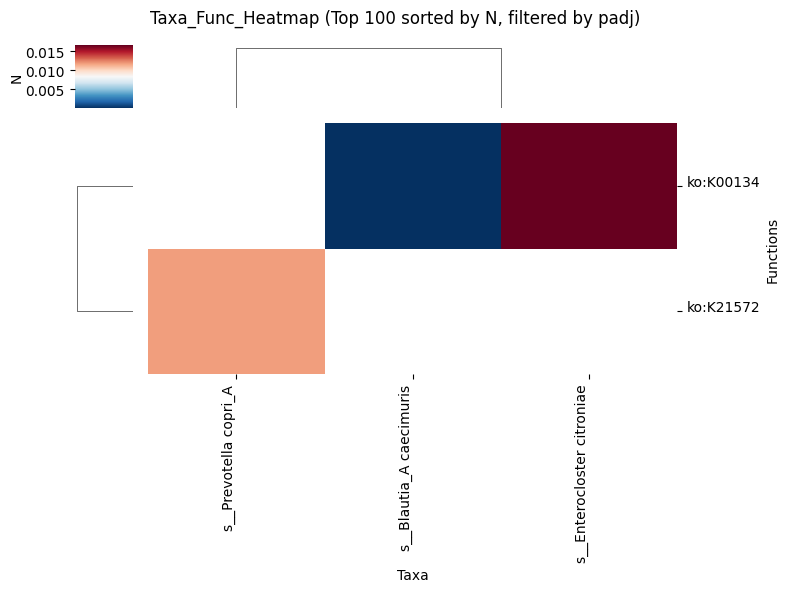

In [168]:
# plot_basic_heatmap_of_test_res for t_test of taxa and func, and other test results
# plot_top_taxa_func_heatmap_of_test_res only for t_test of taxa-func
HeatmapPlot(sw).plot_top_taxa_func_heatmap_of_test_res(
    df=df_t_test,
    top_number=100,
    value_type="p", # or "t" for the t-statistic value
    fig_size=(8, 6),
    pvalue=0.05,
    col_cluster=True,
    row_cluster=True,
    cmap="RdBu_r",
    rename_taxa=True,
    font_size=10,
    title="Taxa_Func_Heatmap",
    show_all_labels=(False, False),
    return_type="fig",
)


# Link Taxa and Functions

## Get the matrix of taxa and functions

In [169]:
# input: a taxon with its function, a function with its taxon,
# and the peptides in the function or taxon
# output: a matrix of the intensity of the taxon or function or peptide in each sample
df_func_in_taxon = sw.GetMatrix.get_intensity_matrix(
    func_name=None,
    taxon_name="d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli_D",
    sample_list =["V1_01", "V5_02"],
)
df_func_in_taxon.head()


,V1_01,V5_02
KEGG_ko,,
ko:K00656,22.539707,0.0


In [170]:
df_taxa_in_fun = sw.GetMatrix.get_intensity_matrix(
    func_name="ko:K00134",
    taxon_name=None,
    # sample_list =["V1_01", "V5_02"],
    condition=["Individual", ["V3", "V4"]],
)
df_taxa_in_fun.head()

group_list not provided, using all groups in meta_df.


,V3_01,V3_26,V3_37,V4_01,V4_26,V4_37,V3_02,V3_03,V3_04,V3_05,...,V4_17,V4_19,V4_20,V4_21,V4_25,V4_27,V4_30,V4_34,V4_35,V4_36
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes hadrus,20.445061,22.243997,21.293889,19.408328,19.433400,18.452479,23.561754,21.910788,0.000000,20.181788,...,20.558601,18.824452,21.058207,0.000000,19.992370,19.907039,18.444716,17.905428,17.935361,0.000000
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Bariatricus|s__Bariatricus comes,18.581105,19.908264,18.286188,18.464622,20.231301,19.461098,19.467848,18.881003,19.035924,18.783190,...,20.531463,0.000000,18.632910,20.211634,0.000000,20.538674,20.066603,19.372672,0.000000,0.000000
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A caecimuris,0.000000,0.000000,0.000000,17.664933,20.191260,17.446171,0.000000,0.000000,0.000000,0.000000,...,18.400529,0.000000,0.000000,0.000000,17.282129,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Enterocloster|s__Enterocloster citroniae,19.549016,19.603036,19.172393,0.000000,0.000000,20.496382,0.000000,0.000000,18.614131,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.535416,0.000000,0.000000,19.374742
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Mediterraneibacter|s__Mediterraneibacter lactaris,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [171]:
# output: a matrix of the intensity of the taxon or function or peptide in each sample
df_peptides_in_taxa_func = sw.GetMatrix.get_intensity_matrix(
    func_name="ko:K00134",
    taxon_name="d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A caecimuris",
    sample_list =["V1_01", "V1_02"],
)
df_peptides_in_taxa_func.head()


,V1_01,V1_02
Sequence,,
AASNE(Cation_Ca[II])SFGYNEDEIVSSDIVGMK,0.000000,0.000000
AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK,0.000000,0.000000
AASNESFGYN(Deamidated)EDEIVSSDIVGMK,0.000000,0.000000
AASNESFGYNE(Cation_Na)DEIVSSDIVGMK,0.000000,0.000000
AASNESFGYNED(Cation_Ca[II])EIVSSDIVGMK,17.932267,18.143607


In [172]:
# get the intensity matrix of a peptide

sw.GetMatrix.get_intensity_matrix(
    peptide_seq = 'AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK',
)

,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Sequence,,,,,,,,,,,,,,,,,,,,,
AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK,0,0,0,0,0,0,0,0,0,0,...,1578028,0,0,1038678,0,0,0,0,0,797216
